In [1]:
import os
import bls_cpu as gbls
import transitPy5 as tpy5
import transitfit5 as tf5
import utils_python.transitfit as transitf
import utils_python.transitplot as transitp
import numpy as np
import pandas as pd

freqs:  0.0056025706790483205 2.0
nstep:  150798


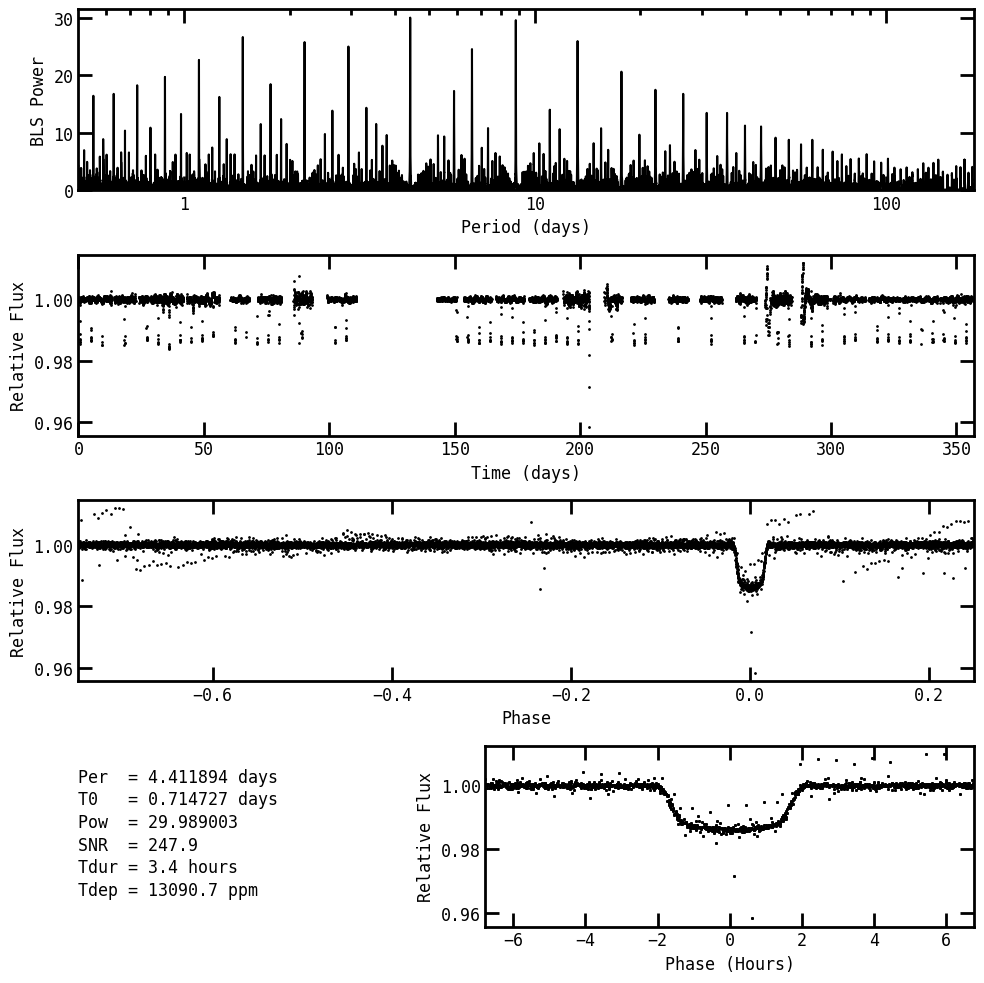

ρ (g/cm³):                      0.5673629
c1:                                   0.0
c2:                                   0.0
q1:                                   0.6
q2:                                   0.4
Dilution:                             0.0
Velocity Offset:                      0.0
Photometric zero point:         1.854e-06
t0 (days):                      0.7141437
Period (days):                  4.4119318
Impact parameter:               0.4903848
Rp/R*:                          0.1096623
sqrt(e)cos(w):                        0.0
sqrt(e)sin(w):                        0.0
RV Amplitude (m/s):                   0.0
Thermal eclipse depth (ppm):          0.0
Ellipsoidal variations (ppm):         0.0
Albedo amplitude (ppm):               0.0


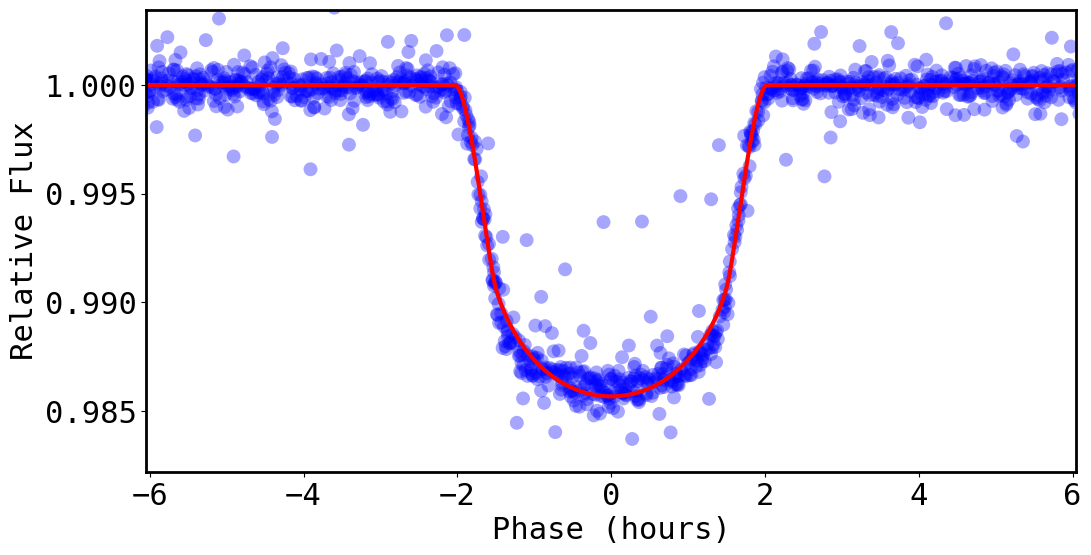

In [6]:
# Single light curve

tic = 149603524
datadir = "/data2/TESS/ffisearch/cvzsearch_yr1/cvz1toiv2/tlc" + str(tic) + "/tlc" + str(tic) + "_5.dn.dat"

gbls_inputs = gbls.gbls_inputs_class()
phot, sol_fit, _ = transitf.analyseLightCurve(datadir, gbls_inputs)

transitp.printParams(sol_fit)
transitp.plotTransit(phot.time - gbls_inputs.zerotime, phot.flux + 1, sol_fit, phot.itime)

In [4]:
def createResultFile(fileLoc, id_to_save):
    header = np.array(["ρ (g/cm³)", "c1", "c2", "q1", "q2",
     "Dilution", "V. Offset", "Zpt",
     "t0 (days)", "P (days)", "b", "Rp/R*",
     "sqrt(e)cos(w)", "sqrt(e)sin(w)", "RV amp. (m/s)",
     "Eclipse depth (ppm)", "Ell var. (ppm)", "Albedo amp. (ppm)"])[id_to_save]
    df = pd.DataFrame(np.insert(header, 0, ["tic", "BLS Power", "BLS SNR", "BLS Depth (ppm)"])).T
    df.to_csv(fileLoc, index=False, header=False)

#0 - tlc55450156
freqs:  0.005603553619047119 2.0
nstep:  153248


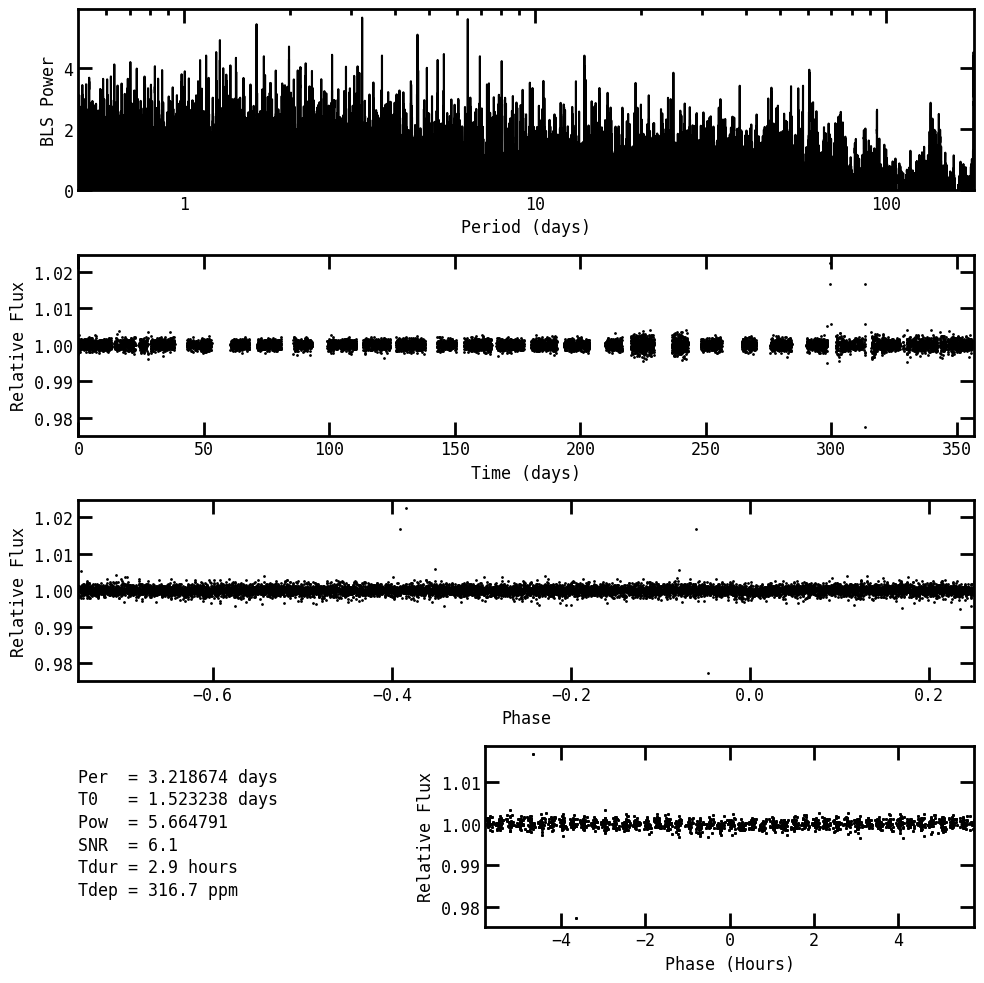

ρ (g/cm³):                      0.7331506
c1:                                   0.0
c2:                                   0.0
q1:                                   0.6
q2:                                   0.4
Dilution:                             0.0
Velocity Offset:                      0.0
Photometric zero point:         1.499e-05
t0 (days):                      1.5153078
Period (days):                  3.2189518
Impact parameter:               0.5480445
Rp/R*:                          0.0190760
sqrt(e)cos(w):                        0.0
sqrt(e)sin(w):                        0.0
RV Amplitude (m/s):                   0.0
Thermal eclipse depth (ppm):          0.0
Ellipsoidal variations (ppm):         0.0
Albedo amplitude (ppm):               0.0


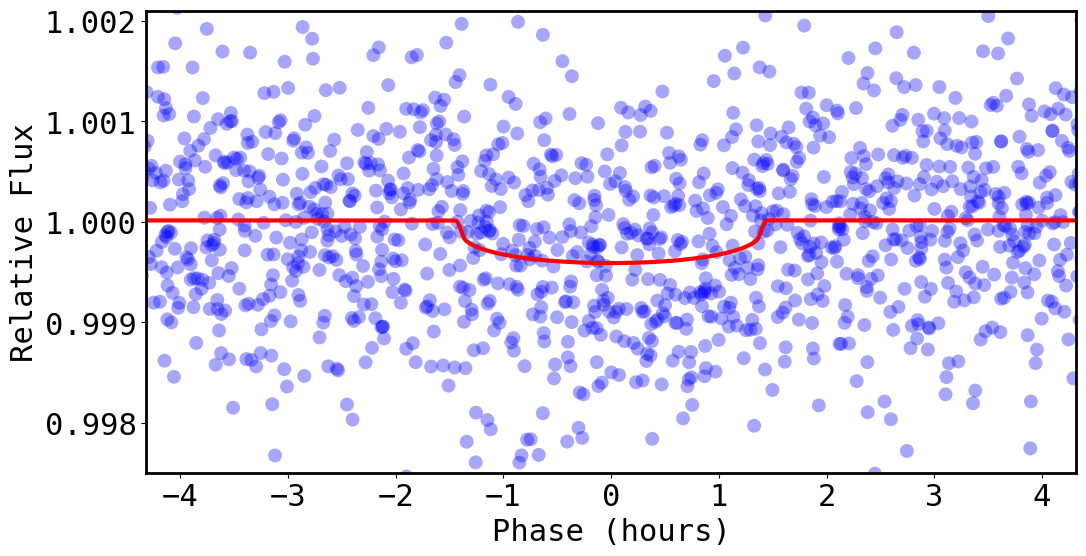


#1 - tlc29781292
freqs:  0.005602571573629212 2.0
nstep:  152174


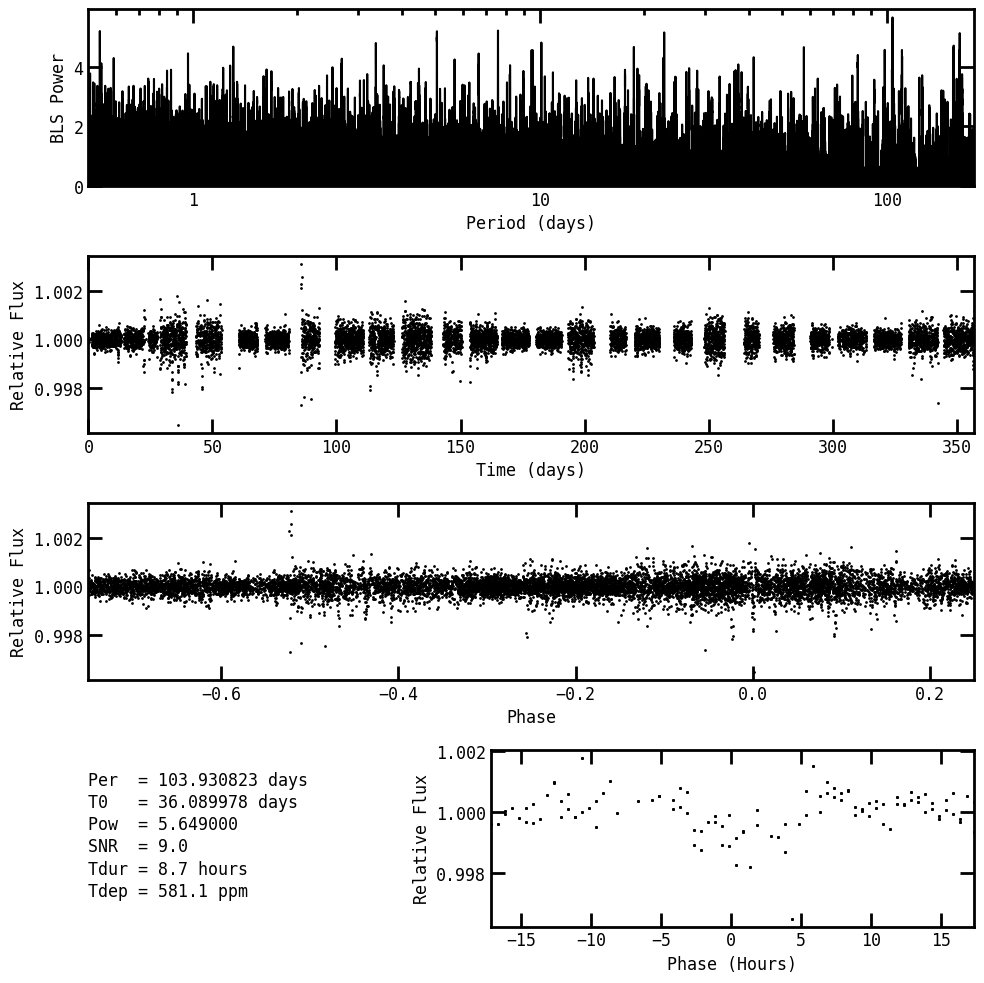

ρ (g/cm³):                      0.6069400
c1:                                   0.0
c2:                                   0.0
q1:                                   0.6
q2:                                   0.4
Dilution:                             0.0
Velocity Offset:                      0.0
Photometric zero point:        -1.949e-07
t0 (days):                     36.1241428
Period (days):                 103.9444199
Impact parameter:               0.5040765
Rp/R*:                          0.0242178
sqrt(e)cos(w):                        0.0
sqrt(e)sin(w):                        0.0
RV Amplitude (m/s):                   0.0
Thermal eclipse depth (ppm):          0.0
Ellipsoidal variations (ppm):         0.0
Albedo amplitude (ppm):               0.0


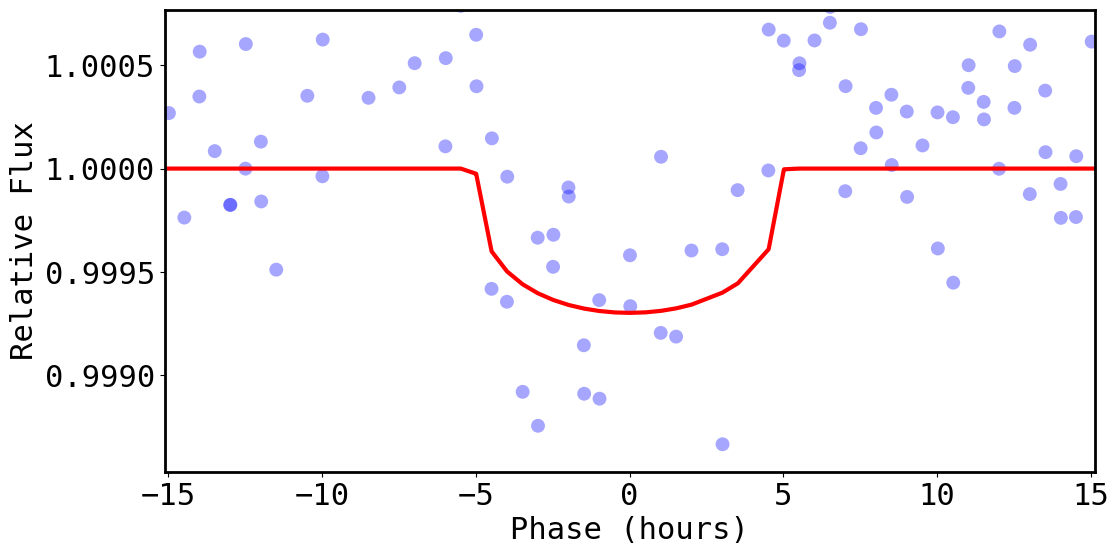

In [5]:
# Analyse directory

datadir = "/data2/TESS/ffisearch/cvzsearch_yr1/cvz1toiv2"

n = 2
offset = 200

plot = True
save = False
file_output = "data/test2.csv"
id_to_save = np.array([0, 7, 8, 9, 10, 11])

# Create text file output
if save:
    createResultFile(file_output, id_to_save)

# Find all directories in folder
subdirectories = [x[0] for x in os.walk(datadir)][1+offset : n+1+offset]

for i, subdir in enumerate(subdirectories):
    head, tail = os.path.split(subdir)
    dataPath = head + "/" + tail +  "/" + tail + "_2.dn.dat"

    print(f"#{i} - {tail}")

    gbls_inputs = gbls.gbls_inputs_class()
    gbls_inputs.plots = 1 if plot else 0
    try:
        phot, sol_fit, gbls_ans = transitf.analyseLightCurve(dataPath, gbls_inputs)
    except FileNotFoundError:
        print(f"Couldn't find {dataPath}")
        continue

    # Output
    if plot:
        transitp.printParams(sol_fit)
        transitp.plotTransit(phot.time - gbls_inputs.zerotime, phot.flux + 1, sol_fit, phot.itime)
    if save:
        dataSeries = pd.Series(sol_fit[id_to_save])
        dataSeries = pd.concat([pd.Series([tail, gbls_ans.bpower, gbls_ans.snr, gbls_ans.depth*1e6]), dataSeries]).reset_index(drop=True)
        # Convert to dataFrame and float
        df = dataSeries.to_frame().T
        cols_to_float = df.columns[1:]
        df[cols_to_float] = df[cols_to_float].astype(float)
        df.to_csv(file_output, mode="a", float_format="%.8g", header=False, index=False)

    print("")